# Setup

📝 *Import required libraries and files:*

In [1]:
import pandas as pd
import numpy as np
#    ---- EDA ----
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
#    ---- Data Scaling ----
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
#    ---- Feature Engeneering / Composites ----
from typing import Dict, Iterable
import re

In [2]:
path = "dfs/df_raw.parquet"
df = pd.read_parquet(path)
pd.set_option('display.max_columns', None)
print(f"Shape of df: {df.shape}")

Shape of df: (9001, 141)


# 2.1. - Data Cleaning

**Create `PlayerID`**

In [3]:
df.insert(0, "PlayerID", range(1, len(df) + 1))

In [4]:
df.head(2)

,PlayerID,League,Rk,Player,Nation,Pos,Squad,Playing Time MP,Playing Time Starts,Playing Time Min,Playing Time 90s,Performance Gls,Performance Ast,Performance G+A,Performance G-PK,Performance PK,Performance PKatt,Performance CrdY,Performance CrdR,Expected xG,Expected npxG,Expected xAG,Expected npxG+xAG,Progression PrgC,Progression PrgP,Progression PrgR,Per 90 Minutes Gls,Per 90 Minutes Ast,Per 90 Minutes G+A,Per 90 Minutes G-PK,Per 90 Minutes G+A-PK,Per 90 Minutes xG,Per 90 Minutes xAG,Per 90 Minutes xG+xAG,Per 90 Minutes npxG,Per 90 Minutes npxG+xAG,Standard Sh,Standard SoT,Standard SoT%,Standard Sh/90,Standard SoT/90,Standard G/Sh,Standard G/SoT,Standard Dist,Standard FK,Standard PK,Standard PKatt,Expected npxG/Sh,Expected G-xG,Expected np:G-xG,Total Cmp,Total Att,Total Cmp%,Total TotDist,Total PrgDist,Short Cmp,Short Att,Short Cmp%,Medium Cmp,Medium Att,Medium Cmp%,Long Cmp,Long Att,Long Cmp%,Ast,xAG,Expected xA,Expected A-xAG,KP,1/3,PPA,CrsPA,PrgP,SCA SCA,SCA SCA90,SCA Types PassLive,SCA Types PassDead,SCA Types TO,SCA Types Sh,SCA Types Fld,SCA Types Def,GCA GCA,GCA GCA90,GCA Types PassLive,GCA Types PassDead,GCA Types TO,GCA Types Sh,GCA Types Fld,GCA Types Def,Tackles Tkl,Tackles TklW,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Challenges Tkl,Challenges Att,Challenges Tkl%,Challenges Lost,Blocks Blocks,Blocks Sh,Blocks Pass,Int,Tkl+Int,Clr,Err,Touches Touches,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Touches Live,Take-Ons Att,Take-Ons Succ,Take-Ons Succ%,Take-Ons Tkld,Take-Ons Tkld%,Carries Carries,Carries TotDist,Carries PrgDist,Carries PrgC,Carries 1/3,Carries CPA,Carries Mis,Carries Dis,Receiving Rec,Receiving PrgR,Performance 2CrdY,Performance Fls,Performance Fld,Performance Off,Performance Crs,Performance Int,Performance TklW,Performance PKwon,Performance PKcon,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Won%,Age
0,1,arg1,1,Matías Abaldo,URU,FW,Independiente,3,3,201,2.2,0,0,0,0,0,0,0,0,0.2,0.2,0.0,0.2,3,8,13,0.00,0.00,0.00,0.00,0.00,0.07,0.01,0.09,0.07,0.09,2,1,50.0,0.90,0.45,0.00,0.0,16.7,0,0,0,0.08,-0.2,-0.2,45,64,70.3,597,231,29,36,80.6,13,18,72.2,2,4,50.0,0,0.0,0.3,0.0,1,7,1,1,8,4,1.79,4,0,0,0,0,0,0,0.00,0,0,0,0,0,0,2,1,0,2,0,1,2,50.0,1,3,0,3,1,3,0,0,96,1,9,56,31,3,96,8,1,12.5,6,75.0,50,226,82,3,0,1,11,7,73,13,0,0,3,3,3,1,1,0,0,0,7,3,3,50.0,21
1,2,arg1,2,Lucas Abascia,ARG,DF,Cen. Córdoba–SdE,14,11,1063,11.8,1,1,2,1,0,0,2,0,0.8,0.8,0.1,0.9,7,46,2,0.08,0.08,0.17,0.08,0.17,0.07,0.01,0.07,0.07,0.07,9,2,22.2,0.76,0.17,0.11,0.5,17.2,0,0,0,0.09,0.2,0.2,542,682,79.5,11663,4182,149,172,86.6,305,340,89.7,85,158,53.8,1,0.1,0.3,0.9,2,30,4,0,46,9,0.76,7,0,0,2,0,0,3,0.25,2,0,0,1,0,0,26,17,16,9,1,18,25,72.0,7,16,9,7,36,62,93,1,880,85,415,445,29,13,880,7,4,57.1,3,42.9,448,2377,1442,7,5,0,8,2,494,2,0,6,11,0,0,36,17,0,0,0,70,32,32,50.0,30


**Adjust column names** to facilitate understanding and further analysis.

In [5]:
df = df.rename(columns={
    "Playing Time MP": "Matches",
    "Playing Time Starts": "Starts",
    "Playing Time Min": "Minutes",
    "Performance Gls": "Goals",
    "Performance Ast": "Assists",
    "Performance G+A": "Goals+Assists",
    "Performance G-PK": "Goals not Penalty",
    "Performance PK": "Penalty Goals",
    "Performance PKatt": "Penalty Attempts",
    "Performance CrdY": "Yellow Cards",
    "Performance CrdR": "Red Cards",
    "Expected xG": "Expected Goals",
    "Progression PrgC": "Prog Carries",
    "Progression PrgP": "Prog Passes",
    "Expected G-xG": "Goals Minus Expected",
    "Total Cmp": "Cmp Passes",
    "Total Cmp%": "Cmp Passes%",
    "Total TotDist":"Passing Distance",
    "Total PrgDist":"Pass Prog Distance",
    "SCA SCA":"Shoot Creating Actions",
    "Standard Sh":"Shoots",
    "Standard SoT":"Shoots on Target",
    "Standard SoT%":"Shoots on Target %",
    "Standard G/Sh":"Goals/Shoot",
    "Standard G/SoT":"Goals/Shoot_Target",
    "Standard Dist":"AvgShoot Distance",
    "Standard FK":"FreeKick Shoots",
    "KP":"Key Passes",
    "1/3":"Passes Att 3rd",
    "PPA":"Passes Penalty Area",
    "Blocks Blocks":"Blocks",
    "Int":"Interceptions",
    "Clr":"Clearances",
    "Err":"Errors",
    "Touches Touches":"Touches",
    "Tackles Tkl":"Tackles",
    "Tackles TklW":"Tackles Won",
    "Carries Carries":"Carries",
    "GCA GCA":"Goal Creating Actions",
    "Performance Fls":"Fouls Commited",
    "Performance Fld":"Fouls Suffered",
    "Performance Off":"Offsides",
    "Performance Crs":"Crosses",
    "Performance PKwon":"Penalty Won",
    "Performance PKcon":"Penalty Commited",
    "Performance OG":"Own Goals",
    "Performance Recov":"Ball Recoveries"   
})

**Creation of new variables**

In [6]:
# New variables
df['Aerial Duels']=df['Aerial Duels Won']+df['Aerial Duels Lost']
df['Penalty Efficacy']=df['Penalty Goals']/df['Penalty Attempts']

# Create 'Position' column with simplified labels
POSITION_MAP = {
    "DF": "Defender",
    "DF,FW": "Defender",
    "DF,MF": "Defender",
    "MF": "Midfielder",
    "MF,DF": "Midfielder",
    "MF,FW": "Midfielder",
    "FW": "Forward",
    "FW,DF": "Forward",
    "FW,MF": "Forward",
}

df["Position"] = df["Pos"].map(POSITION_MAP)

# Identify players elegible for analysis - i.e., more than 300 minutes played
df['elegible'] = (df['Minutes'] >= 300).astype(int)

# Merge Shoot Creating Actions with Goal Creating Actions
df['Goal Creating Actions'] = df['Goal Creating Actions'] + df['Shoot Creating Actions']

# Identify free kick tackers if FreeKick Shoots >= 5
df['FreeKick Tacker'] = (df['FreeKick Shoots'] >= 5).astype(int)

**Drop unnecessary columns**

In [7]:
cols_to_drop = [
    "Rk","Playing Time 90s", "Expected npxG", "Expected xAG", "Progression PrgR", "Per 90 Minutes xAG", "Per 90 Minutes xG+xAG",
    "Per 90 Minutes npxG","Per 90 Minutes npxG+xAG", "Standard PK","FreeKick Shoots", "Standard PKatt","Expected npxG+xAG","Expected npxG/Sh",
    "Expected np:G-xG","Ast","xAG","Expected xA","Expected A-xAG","PrgP","Shoot Creating Actions", "SCA Types PassLive","SCA Types PassDead",
    "SCA Types TO","SCA Types Sh",
    "SCA Types Sh","SCA Types Fld","SCA Types Def","GCA Types PassLive","GCA Types PassDead","GCA Types TO","GCA Types Sh",
    "GCA Types Fld","GCA Types Def","Take-Ons Tkld","Take-Ons Tkld%","Receiving Rec","Receiving PrgR","Carries PrgC","Performance 2CrdY",
    "Performance TklW","Challenges Lost","Short Att","Medium Att","Long Att","Passes Att 3rd","Passes Penalty Area","CrsPA","Challenges Tkl",
    "Challenges Att","Challenges Tkl%","Total Att","Touches Live","Performance Int","Carries Mis","Carries Dis","Take-Ons Att",
    'Aerial Duels Won','Aerial Duels Lost','Tackles Def 3rd', 'Tackles Mid 3rd', 'Tackles Att 3rd', 'Blocks Sh','Blocks Pass','Tkl+Int',
    'Touches Def Pen','Touches Def 3rd','Touches Mid 3rd','Touches Att 3rd','Touches Att Pen','Carries CPA','GCA GCA90','SCA SCA90','Per 90 Minutes Gls','Per 90 Minutes Ast','Per 90 Minutes G+A',
    'Per 90 Minutes G+A-PK','Per 90 Minutes G-PK', 'Per 90 Minutes xG','Standard Sh/90','Standard SoT/90','Goals/Shoot_Target','Goals+Assists',
    'Shoots on Target %','Penalty Attempts'
]
    
df.drop(columns=cols_to_drop, inplace=True)

print(f"Shape: {df.shape}")

Shape: (9001, 63)


**Drop unnecessary rows**

In [8]:
# Remove goalkeepers from df_scaled (out of scope of my football scout)
df = df[df["Pos"] != "GK"].copy()

**Set column order** by topic

In [9]:
cols_order = [
    # Player Info
    'PlayerID','Player','League','Squad','elegible','Position','Pos','Age','Nation','Matches','Starts','Minutes',
    # Ofensive Stats
    'Goals','Expected Goals','Goals Minus Expected','Goals not Penalty','Penalty Goals','Penalty Efficacy',
    'Shoots','Shoots on Target','Goals/Shoot','AvgShoot Distance','FreeKick Tacker',
    'Assists','Crosses',
    'Penalty Won','Offsides',
    #Passing
    'Cmp Passes','Cmp Passes%', 'Prog Passes', 'Passing Distance','Pass Prog Distance',
    'Short Cmp', 'Short Cmp%', 'Medium Cmp', 'Medium Cmp%', 'Long Cmp', 'Long Cmp%',
    'Key Passes','Goal Creating Actions',
    # Possession
    'Take-Ons Succ','Take-Ons Succ%','Fouls Suffered',
    'Carries','Carries TotDist','Prog Carries','Carries PrgDist','Carries 1/3', 
    'Touches','Errors',
    # Defensive
    'Aerial Duels','Aerial Duels Won%',
    'Tackles','Tackles Won', 'Blocks','Interceptions','Ball Recoveries','Clearances',
    'Own Goals',
    # Discipline
    'Fouls Commited','Penalty Commited','Yellow Cards','Red Cards'
]

In [10]:
# safety check (raises if missed or duplicated any column)
assert set(cols_order) == set(df.columns)
df = df.loc[:, cols_order]

In [11]:
from collections import Counter
import difflib

order = cols_order
actual = list(df.columns)

set_order, set_actual = set(order), set(actual)

missing_in_order = [c for c in actual if c not in set_order]   # in df but not in your list
extra_in_order   = [c for c in order  if c not in set_actual]  # in your list but not in df
dups_in_order    = [c for c, n in Counter(order).items() if n > 1]
dups_in_df       = [c for c, n in Counter(actual).items() if n > 1]

print("→ Missing in cols_order:", missing_in_order)
print("→ Extra (typo/mismatch) in cols_order:", extra_in_order)
print("→ Duplicates in cols_order:", dups_in_order)
print("→ Duplicates in df.columns:", dups_in_df)

# show closest matches for suspicious names
for c in extra_in_order:
    print(f"  {c!r} closest in df:", difflib.get_close_matches(c, actual, n=3))

# reveal hidden whitespace
suspect_ws = [c for c in actual if c.strip() != c]
if suspect_ws:
    print("→ Columns with leading/trailing spaces in df:", [repr(c) for c in suspect_ws])


→ Missing in cols_order: []
→ Extra (typo/mismatch) in cols_order: []
→ Duplicates in cols_order: []
→ Duplicates in df.columns: []


In [12]:
df_cleaned = df
print(f"Shape df_cleaned: {df_cleaned.shape}")
df_cleaned.head(2)

Shape df_cleaned: (8367, 63)


,PlayerID,Player,League,Squad,elegible,Position,Pos,Age,Nation,Matches,Starts,Minutes,Goals,Expected Goals,Goals Minus Expected,Goals not Penalty,Penalty Goals,Penalty Efficacy,Shoots,Shoots on Target,Goals/Shoot,AvgShoot Distance,FreeKick Tacker,Assists,Crosses,Penalty Won,Offsides,Cmp Passes,Cmp Passes%,Prog Passes,Passing Distance,Pass Prog Distance,Short Cmp,Short Cmp%,Medium Cmp,Medium Cmp%,Long Cmp,Long Cmp%,Key Passes,Goal Creating Actions,Take-Ons Succ,Take-Ons Succ%,Fouls Suffered,Carries,Carries TotDist,Prog Carries,Carries PrgDist,Carries 1/3,Touches,Errors,Aerial Duels,Aerial Duels Won%,Tackles,Tackles Won,Blocks,Interceptions,Ball Recoveries,Clearances,Own Goals,Fouls Commited,Penalty Commited,Yellow Cards,Red Cards
0,1,Matías Abaldo,arg1,Independiente,0,Forward,FW,21,URU,3,3,201,0,0.2,-0.2,0,0,NaN,2,1,0.00,16.7,0,0,3,0,3,45,70.3,8,597,231,29,80.6,13,72.2,2,50.0,1,4,1,12.5,3,50,226,3,82,0,96,0,6,50.0,2,1,3,1,7,0,0,0,0,0,0
1,2,Lucas Abascia,arg1,Cen. Córdoba–SdE,1,Defender,DF,30,ARG,14,11,1063,1,0.8,0.2,1,0,NaN,9,2,0.11,17.2,0,1,0,0,0,542,79.5,46,11663,4182,149,86.6,305,89.7,85,53.8,2,12,4,57.1,11,448,2377,7,1442,5,880,1,64,50.0,26,17,16,36,70,93,0,6,0,2,0


# 2.2. - Normalize features for 90 minutes

Normalize player stats by dividing absolute features by 90 minutes played.

In [13]:
cols_normalize = [
    'Goals','Expected Goals','Goals Minus Expected','Goals not Penalty','Penalty Goals','Shoots','Shoots on Target',
    'FreeKick_Shoots','Assists','Crosses','Penalty Won','Offsides','Cmp Passes','Prog Passes','Passing Distance','Pass Prog Distance',
    'Short Cmp','Medium Cmp','Long Cmp','Key Passes','Shoot Creating Actions','Goal Creating Actions','Take-Ons Succ','Fouls Suffered',
    'Carries','Carries TotDist','Prog Carries','Carries PrgDist','Carries 1/3','Touches','Touches Def 3rd','Touches Med 3rd','Touches Att 3rd',
    'Errors','Aerial Duels','Tackles','Tackles Won','Blocks','Interceptions','Ball Recoveries','Clearances','Own Goals','Fouls Commited',
    'Penalty Commited','Yellow Cards','Red Cards'
]

# minutes as numeric, avoid division by zero
m = pd.to_numeric(df_cleaned["Minutes"], errors="coerce")
den = m.replace(0, np.nan)

# only normalize columns that exist
cols_ok = [c for c in cols_normalize if c in df_cleaned.columns and c != "Minutes"]

# compute per90 and assign to new columns with *_90m suffix
for c in cols_ok:
    df_cleaned[f"{c}_90m"] = (df_cleaned[c] / den * 90).round(3).fillna(0)

In [14]:
print(f"Shape df_cleaned: {df_cleaned.shape}")
df_cleaned.head(2)

Shape df_cleaned: (8367, 104)


,PlayerID,Player,League,Squad,elegible,Position,Pos,Age,Nation,Matches,Starts,Minutes,Goals,Expected Goals,Goals Minus Expected,Goals not Penalty,Penalty Goals,Penalty Efficacy,Shoots,Shoots on Target,Goals/Shoot,AvgShoot Distance,FreeKick Tacker,Assists,Crosses,Penalty Won,Offsides,Cmp Passes,Cmp Passes%,Prog Passes,Passing Distance,Pass Prog Distance,Short Cmp,Short Cmp%,Medium Cmp,Medium Cmp%,Long Cmp,Long Cmp%,Key Passes,Goal Creating Actions,Take-Ons Succ,Take-Ons Succ%,Fouls Suffered,Carries,Carries TotDist,Prog Carries,Carries PrgDist,Carries 1/3,Touches,Errors,Aerial Duels,Aerial Duels Won%,Tackles,Tackles Won,Blocks,Interceptions,Ball Recoveries,Clearances,Own Goals,Fouls Commited,Penalty Commited,Yellow Cards,Red Cards,Goals_90m,Expected Goals_90m,Goals Minus Expected_90m,Goals not Penalty_90m,Penalty Goals_90m,Shoots_90m,Shoots on Target_90m,Assists_90m,Crosses_90m,Penalty Won_90m,Offsides_90m,Cmp Passes_90m,Prog Passes_90m,Passing Distance_90m,Pass Prog Distance_90m,Short Cmp_90m,Medium Cmp_90m,Long Cmp_90m,Key Passes_90m,Goal Creating Actions_90m,Take-Ons Succ_90m,Fouls Suffered_90m,Carries_90m,Carries TotDist_90m,Prog Carries_90m,Carries PrgDist_90m,Carries 1/3_90m,Touches_90m,Errors_90m,Aerial Duels_90m,Tackles_90m,Tackles Won_90m,Blocks_90m,Interceptions_90m,Ball Recoveries_90m,Clearances_90m,Own Goals_90m,Fouls Commited_90m,Penalty Commited_90m,Yellow Cards_90m,Red Cards_90m
0,1,Matías Abaldo,arg1,Independiente,0,Forward,FW,21,URU,3,3,201,0,0.2,-0.2,0,0,NaN,2,1,0.00,16.7,0,0,3,0,3,45,70.3,8,597,231,29,80.6,13,72.2,2,50.0,1,4,1,12.5,3,50,226,3,82,0,96,0,6,50.0,2,1,3,1,7,0,0,0,0,0,0,0.000,0.090,-0.090,0.000,0.0,0.896,0.448,0.000,1.343,0.0,1.343,20.149,3.582,267.313,103.433,12.985,5.821,0.896,0.448,1.791,0.448,1.343,22.388,101.194,1.343,36.716,0.000,42.985,0.000,2.687,0.896,0.448,1.343,0.448,3.134,0.000,0.0,0.000,0.0,0.000,0.0
1,2,Lucas Abascia,arg1,Cen. Córdoba–SdE,1,Defender,DF,30,ARG,14,11,1063,1,0.8,0.2,1,0,NaN,9,2,0.11,17.2,0,1,0,0,0,542,79.5,46,11663,4182,149,86.6,305,89.7,85,53.8,2,12,4,57.1,11,448,2377,7,1442,5,880,1,64,50.0,26,17,16,36,70,93,0,6,0,2,0,0.085,0.068,0.017,0.085,0.0,0.762,0.169,0.085,0.000,0.0,0.000,45.889,3.895,987.460,354.073,12.615,25.823,7.197,0.169,1.016,0.339,0.931,37.930,201.251,0.593,122.088,0.423,74.506,0.085,5.419,2.201,1.439,1.355,3.048,5.927,7.874,0.0,0.508,0.0,0.169,0.0


# 2.3. - Exploratory Data Analysis (EDA)

In this section we perform an exploratory analysis of the data to understand variables' statistics, relationships and distribution.

**General League Statistics**:

In [15]:
df_cleaned[df_cleaned['elegible']==1].describe()

,PlayerID,elegible,Age,Matches,Starts,Minutes,Goals,Expected Goals,Goals Minus Expected,Goals not Penalty,Penalty Goals,Penalty Efficacy,Shoots,Shoots on Target,Goals/Shoot,AvgShoot Distance,FreeKick Tacker,Assists,Crosses,Penalty Won,Offsides,Cmp Passes,Cmp Passes%,Prog Passes,Passing Distance,Pass Prog Distance,Short Cmp,Short Cmp%,Medium Cmp,Medium Cmp%,Long Cmp,Long Cmp%,Key Passes,Goal Creating Actions,Take-Ons Succ,Take-Ons Succ%,Fouls Suffered,Carries,Carries TotDist,Prog Carries,Carries PrgDist,Carries 1/3,Touches,Errors,Aerial Duels,Aerial Duels Won%,Tackles,Tackles Won,Blocks,Interceptions,Ball Recoveries,Clearances,Own Goals,Fouls Commited,Penalty Commited,Yellow Cards,Red Cards,Goals_90m,Expected Goals_90m,Goals Minus Expected_90m,Goals not Penalty_90m,Penalty Goals_90m,Shoots_90m,Shoots on Target_90m,Assists_90m,Crosses_90m,Penalty Won_90m,Offsides_90m,Cmp Passes_90m,Prog Passes_90m,Passing Distance_90m,Pass Prog Distance_90m,Short Cmp_90m,Medium Cmp_90m,Long Cmp_90m,Key Passes_90m,Goal Creating Actions_90m,Take-Ons Succ_90m,Fouls Suffered_90m,Carries_90m,Carries TotDist_90m,Prog Carries_90m,Carries PrgDist_90m,Carries 1/3_90m,Touches_90m,Errors_90m,Aerial Duels_90m,Tackles_90m,Tackles Won_90m,Blocks_90m,Interceptions_90m,Ball Recoveries_90m,Clearances_90m,Own Goals_90m,Fouls Commited_90m,Penalty Commited_90m,Yellow Cards_90m,Red Cards_90m
count,6040.000000,6040.0,6029.0,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,641.000000,6040.000000,6040.000000,5947.000000,5947.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6027.000000,6040.000000,6040.000000,6040.000000,5902.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.00000,6040.000000,6040.000000,6040.000000,6040.000000,6036.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.00000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000
mean,4572.494868,1.0,26.775751,21.518377,15.618212,1389.851987,2.012914,2.060364,-0.048444,1.843377,0.169536,0.756061,19.038411,6.233609,0.083097,17.677585,0.037583,1.404305,27.563079,0.158113,2.552152,541.788907,77.562583,56.568212,9364.608609,3038.644536,244.428974,85.842368,236.510927,81.498146,47.130132,55.572822,14.254305,37.010265,11.051987,46.092121,17.672682,464.010099,2422.840728,24.408444,1195.53957,17.763245,847.817219,0.654305,44.457947,46.172614,25.494536,15.663245,16.448344,12.934437,61.29404,38.366225,0.058609,18.649007,0.187252,3.140894,0.140397,0.129135,0.137321,-0.008226,0.119573,0.009565,1.280642,0.416862,0.088080,1.796329,0.010827,0.179721,33.731118,3.548463,578.270468,185.129654,15.442485,14.504226,2.886603,0.923074,2.400808,0.748985,1.190582,29.391243,154.155562,1.604717,75.134811,1.166979,53.664425,0.040928,2.967267,1.670656,1.027499,1.060535,0.816253,3.936281,2.375622,0.003779,1.274107,0.012504,0.216912,0.010117
std,2562.854823,0.0,4.25671,8.870319,9.336665,786.123963,3.080393,2.728785,1.234277,2.727869,0.681941,0.371211,18.228840,7.203927,0.098369,5.167678,0.190201,1.916829,37.067175,0.460387,4.158269,437.742522,8.590020,46.986573,8029.537334,2880.836658,188.806707,7.198456,221.210478,9.757754,45.925319,14.285583,13.839889,31.449682,11.851706,19.216693,14.459025,337.041640,1800.967728,24.519355,974.52733,16.364602,585.550140,1.039395,40.746071,16.121724,19.047643,12.026638,11.857602,11.474574,41.38254,42.841

In [16]:
league_statistics = df_cleaned.groupby('League').agg({
    'Age': 'mean',
    'Matches': 'max',
    'Minutes': 'sum',
    'Goals': 'sum',
    'Penalty Goals': 'sum',
    'Assists': 'sum',
    'Shoots':'sum',
    'Shoots on Target':'sum',
    'AvgShoot Distance':'mean',
    'Crosses':'sum',    
    'Cmp Passes':'sum',
    'Prog Passes':'sum',
    'Cmp Passes%': 'mean',
    'Aerial Duels': 'sum',
    'Tackles':'sum',
    'Blocks':'sum',
    'Interceptions':'sum',
    'Errors':'sum',
    'Fouls Commited': 'sum',
    'Yellow Cards': 'sum',
    'Red Cards': 'sum',
}).round(1)

league_statistics ['Games Aprx'] = league_statistics ['Minutes'] / (90*22) # 90 minutes and 22 players (11 x 2) --> it's an approximation
league_statistics.drop('Minutes', axis=1, inplace=True)

cols_to_normalize = [
    'Goals','Penalty Goals','Assists',
    'Shoots','Shoots on Target','Crosses',
    'Cmp Passes','Prog Passes',
    'Aerial Duels','Tackles','Blocks','Interceptions','Errors',
    'Fouls Commited','Yellow Cards','Red Cards'
]

league_statistics [cols_to_normalize] =  league_statistics [cols_to_normalize].div(
    league_statistics['Games Aprx'], axis=0
)

league_statistics.drop('Games Aprx', axis=1, inplace=True)

league_statistics = league_statistics.sort_index().round(2)

# Save File as a csv
league_statistics.to_excel(r"C:\Users\pedro\OneDrive\Escritorio\Projetos\Football Scout\league_stats.xlsx", index=True)

display (league_statistics)

,Age,Matches,Goals,Penalty Goals,Assists,Shoots,Shoots on Target,AvgShoot Distance,Crosses,Cmp Passes,Prog Passes,Cmp Passes%,Aerial Duels,Tackles,Blocks,Interceptions,Errors,Fouls Commited,Yellow Cards,Red Cards
League,,,,,,,,,,,,,,,,,,,,
arg1,26.4,24,2.09,0.19,1.42,25.43,7.82,19.1,43.10,629.02,78.92,71.2,78.81,39.77,24.01,20.29,0.58,27.80,5.65,0.26
bel1,24.9,30,2.86,0.27,1.94,29.11,9.68,16.8,40.75,770.02,90.58,75.3,68.76,40.10,25.77,20.05,0.70,23.74,4.33,0.24
bra1,27.1,21,2.60,0.24,1.88,28.04,8.94,18.8,41.27,789.02,81.17,79.7,56.00,36.75,22.62,18.06,1.00,30.52,4.99,0.19
eng1,26.2,38,3.14,0.20,2.31,28.33,9.53,16.6,38.80,815.66,81.36,79.7,56.59,38.71,23.97,17.47,1.56,24.30,4.46,0.15
eng2,26.1,46,2.59,0.13,1.81,25.94,8.10,16.9,39.48,723.66,72.67,73.7,76.07,36.35,23.58,17.67,0.71,25.10,4.07,0.12
fra1,25.3,34,3.19,0.34,2.19,27.11,9.64,17.1,38.06,855.21,86.65,79.3,50.28,39.57,23.60,19.96,1.17,26.74,4.06,0.24
ger1,26.3,34,3.37,0.21,2.42,28.40,9.60,16.9,40.19,826.29,83.17,76.4,68.88,34.18,26.88,18.88,1.16,23.57,4.19,0.19
ita1,26.3,38,2.72,0.23,1.94,26.45,8.41,17.8,38.00,777.73,75.87,78.3,62.93,33.50,21.51,16.24,1.06,27.64,4.21,0.22
ita2,26.4,38,2.63,0.20,1.78,28.19,8.59,17.8,42.52,692.98,74.93,75.5,78.46,32.17,22.77,15.96,0.58,33.64,5.32,0.25


While there are no extreme abnormal results, it is possible to see the difference between the leagues, reflecting different playing styles. 

As an example, the portuguese league ('por1') has more penalty goals, fouls, yellow and red cards than average. On the otherside, the english Premier League ('eng1') is characterized by having more goals, assists, % Comp Passes then average.

**Relationship between variables**:

In [17]:
def corr_heatmap(df, cols, method="pearson", figsize=(8,6)):
    """
    Draw a correlation heatmap for selected columns in df.
    """
    cols_ok = [c for c in cols if c in df.columns]
    if not cols_ok:
        raise ValueError("None of the requested columns exist in the DataFrame.")
    if len(cols_ok) < len(cols):
        print("⚠️ Skipping missing columns:", [c for c in cols if c not in cols_ok])

    X = df[cols_ok].apply(pd.to_numeric, errors="coerce")
    corr = X.corr(method=method)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")

    ax.set_xticks(range(len(cols_ok))); ax.set_xticklabels(cols_ok, rotation=45, ha="right")
    ax.set_yticks(range(len(cols_ok))); ax.set_yticklabels(cols_ok)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(f"{method.title()} correlation")

    # annotate cells
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center", fontsize=9)

    ax.set_title("Correlation heatmap")
    plt.tight_layout()
    plt.show()

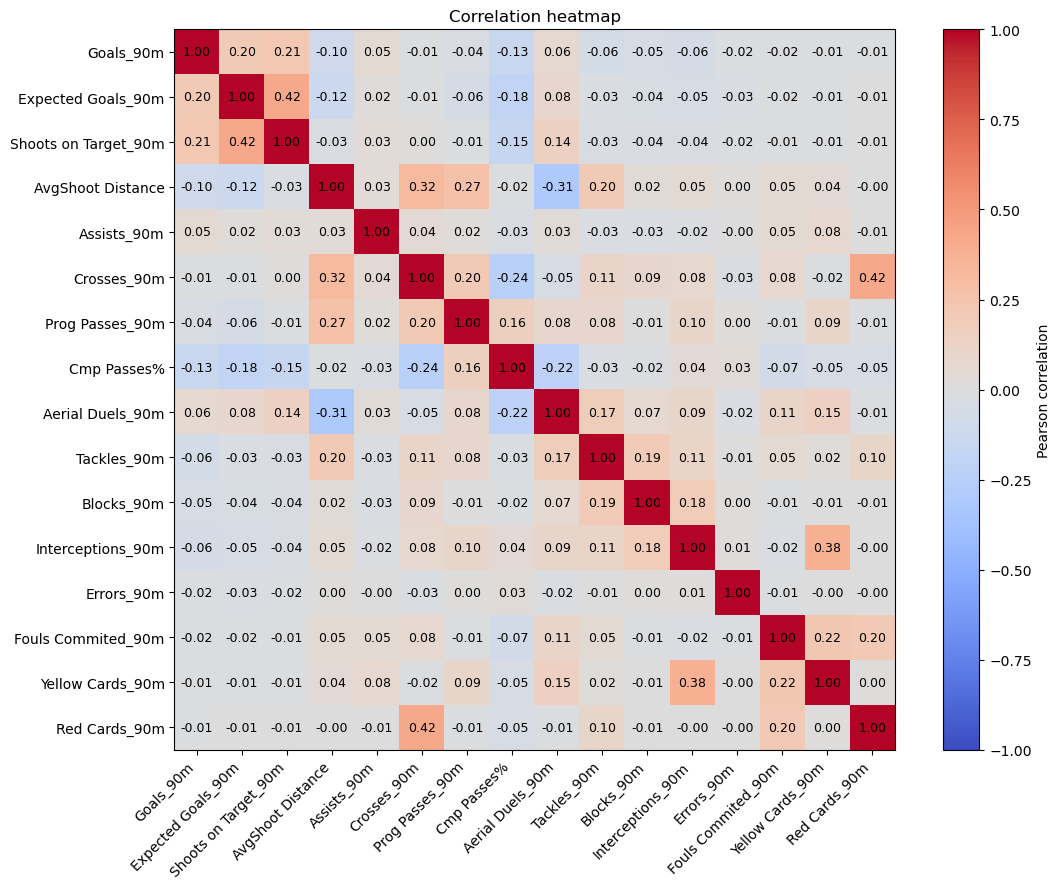

In [18]:
cols_heat = ["Goals_90m", "Expected Goals_90m", "Shoots on Target_90m", "AvgShoot Distance", "Assists_90m", "Crosses_90m",
             "Prog Passes_90m", "Cmp Passes%","Aerial Duels_90m", "Tackles_90m", "Blocks_90m", "Interceptions_90m", "Errors_90m", 
             "Fouls Commited_90m", "Yellow Cards_90m", "Red Cards_90m"]

corr_heatmap(df=df_cleaned, cols= cols_heat, figsize = (13,9))

The correlation between most of the variables is non existent or weak, with few exceptions such as betweeen 'Yellow Cards' and 'Interceptions' and between 'Shoots on Target' and 'Expected Goals'.

**Variance and distribution**:

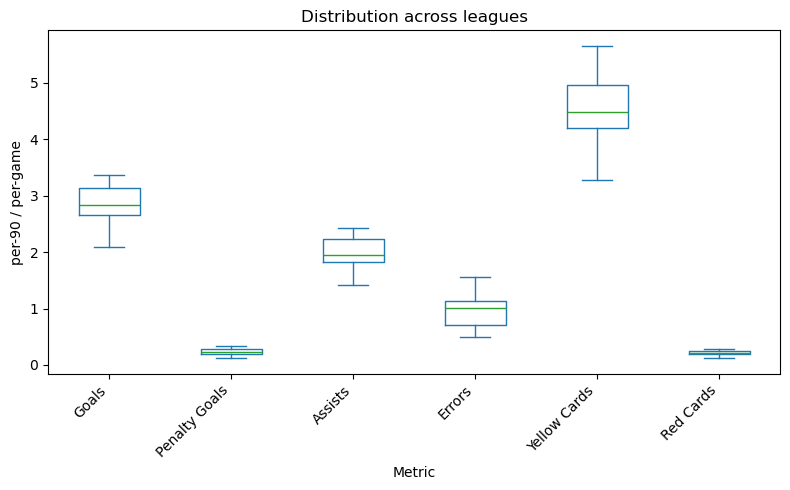

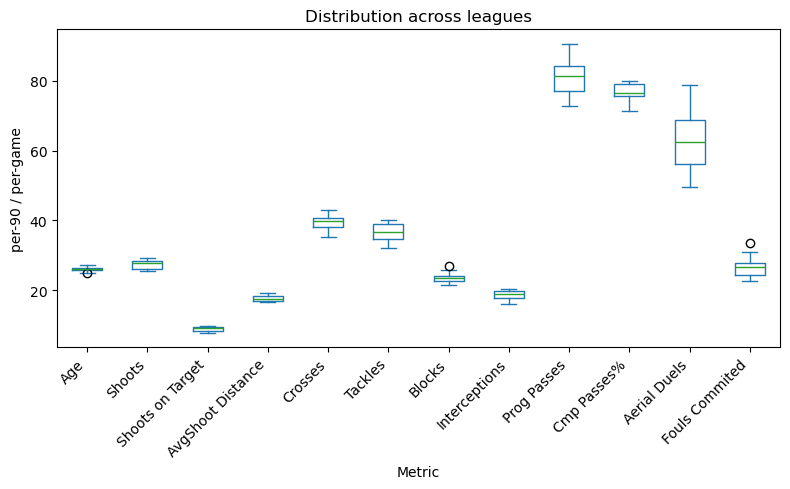

In [19]:
def boxplot_by_metric(league_statistics: pd.DataFrame, metrics, figsize=(8,5), ylabel="per-90 / per-game"):
    cols = [c for c in metrics if c in league_statistics.columns]
    if not cols:
        raise ValueError("None of the requested metrics exist.")
    ax = league_statistics[cols].plot(kind="box", figsize=figsize)
    ax.set_title("Distribution across leagues")
    ax.set_xlabel("Metric")
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


boxplot_by_metric(
    league_statistics,
    ['Goals','Penalty Goals','Assists','Errors','Yellow Cards','Red Cards']
)

boxplot_by_metric(
    league_statistics,
    ['Age','Shoots','Shoots on Target','AvgShoot Distance','Crosses','Tackles','Blocks','Interceptions','Prog Passes','Cmp Passes%','Aerial Duels','Fouls Commited']
)

The fact that the values are not scaled yet, harms visualization. Still, it is possible to observe that some variables (e.g., 'Yellow Cards' and 'Aerial Duels') have more variance than others when comparing league stats. 

In [20]:
def plot_skew_grid(df, cols, bins="auto", ncols=4, figsize=None, winsor=None):
    """
    Small-multiples histograms with skewness per variable.

    df:      origin dataframe
    cols:    list of column names to plot
    bins:    'auto' or an int
    ncols:   number of charts per row
    figsize: (width, height); if None, sized from ncols/rows
    winsor:  optional percentile to clip tails for readability (e.g., 1 or 2)
    """
    cols = [c for c in cols if c in df.columns]
    if not cols:
        raise ValueError("None of the requested columns exist in the DataFrame.")

    k = len(cols)
    nrows = int(np.ceil(k / ncols))
    if figsize is None:
        figsize = (ncols * 3.0, nrows * 2.5)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)
    axes = axes.ravel()

    for ax, c in zip(axes, cols):
        s = pd.to_numeric(df[c], errors="coerce")
        if winsor is not None:
            lo, hi = np.nanpercentile(s, [winsor, 100 - winsor])
            s = s.clip(lo, hi)
        s = s.dropna()
        if s.empty:
            ax.axis("off"); continue

        ax.hist(s, bins=bins)
        mu, med, sk = s.mean(), s.median(), s.skew()

        ax.axvline(mu, linestyle="-", linewidth=1)
        ax.axvline(med, linestyle="--", linewidth=1)
        ax.set_title(c, fontsize=9)
        ax.text(
            0.98, 0.95, f"skew={sk:.2f}\nn={len(s)}",
            transform=ax.transAxes, ha="right", va="top", fontsize=8,
            bbox=dict(boxstyle="round", alpha=0.2, lw=0),
        )
        ax.set_yticks([])

    for ax in axes[k:]:
        ax.axis("off")

    fig.suptitle("Distributions & skewness", y=1.02, fontsize=12)
    fig.tight_layout()
    plt.show()

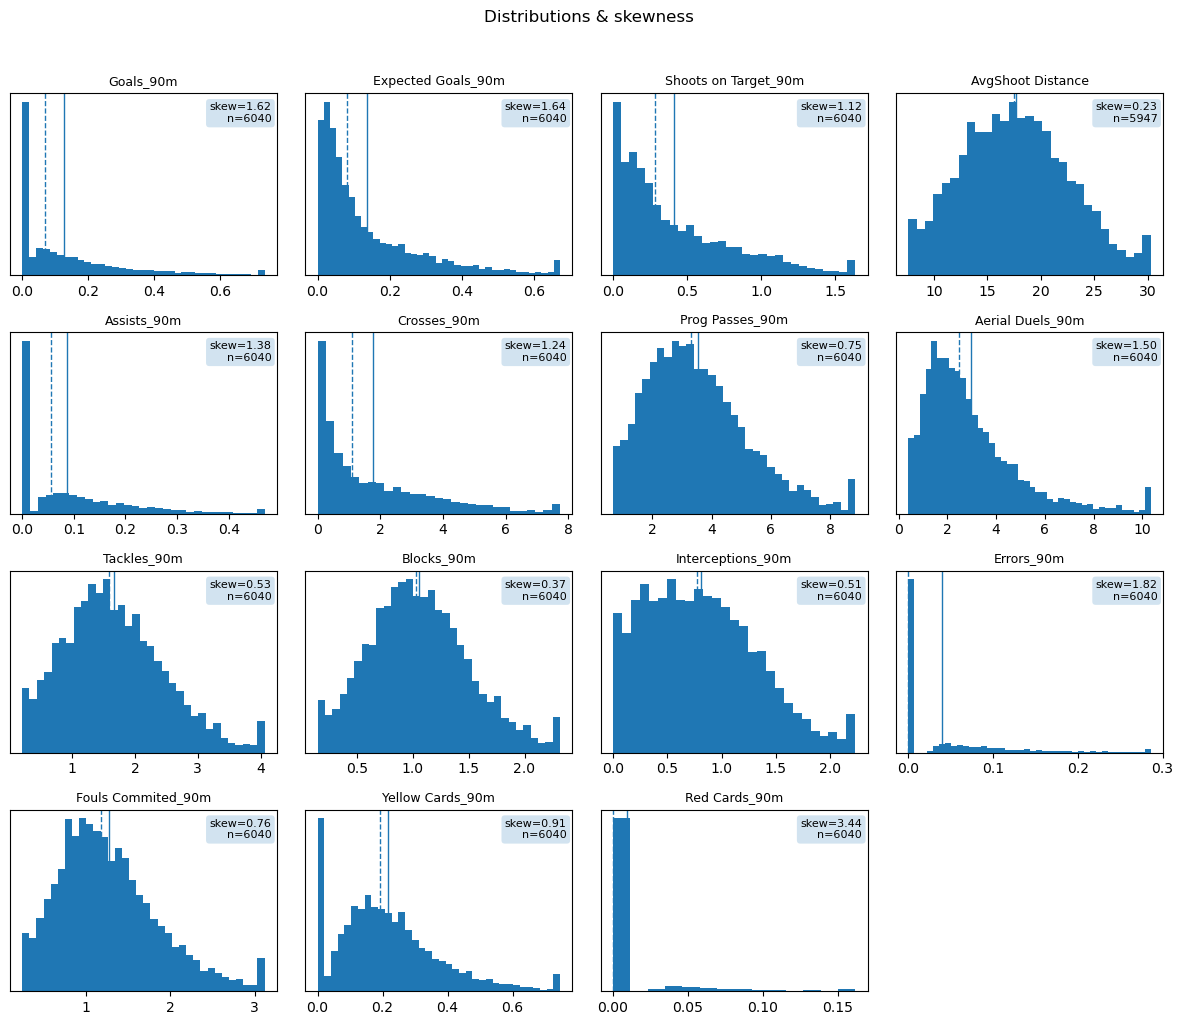

In [21]:
plot_skew_grid(
    df_cleaned[df_cleaned['elegible']==1],
    cols=["Goals_90m", "Expected Goals_90m", "Shoots on Target_90m", "AvgShoot Distance", "Assists_90m", "Crosses_90m", 
          "Prog Passes_90m", "Cmp% Passes", "Aerial Duels_90m", "Tackles_90m", "Blocks_90m", "Interceptions_90m", "Errors_90m", 
          "Fouls Commited_90m", "Yellow Cards_90m", "Red Cards_90m"],
    bins="auto",     
    ncols=4,
    winsor=1        
)

**Data is highly right-skewed**. Since data os normalized by 90 minutes played, there are many outliers that probably are given by players with few minutes and existent values in the analyzed statistic (e.g., a player that just played 30 min the whole season but scored a goal will have a high value in the variable 'Goals' when normalize). These **outliers will have to be addressed when designing the scouting functions**.

# 2.4. - Data Scaling

To **scale player stats** the following process was followed:

- Application of winsorization (default 1.0) before MinMax so outliers don’t dominat;

- Run 'yeo-johnson' power transformation to obtain a more normal distribution and reduce impact of outliers;

- Execute 'MinMaxScaler' to put all the values in the same [0,1] range.

New columns named `*_scaled` were created in the new `df_scaled`.

In [22]:
def add_scaled_columns_full(
    df: pd.DataFrame,
    cols_to_scale,
    winsor_pct: float | None = 0.5,   # e.g., 1.0 -> clip to [1%, 99%]; None to disable
    out_decimals: int = 3,
):
    """
    For each column in cols_to_scale:
      - use only rows where df['elegible'] == 1 (and value not NaN) for fit+transform
      - Winsorize those eligible values by [q, 1-q]
      - MinMax-scale to [0,1]
      - write results to <col>_scaled
      - non-eligible or NaN inputs remain NaN in <col>_scaled
    """
    out = df.copy()

    for col in cols_to_scale:
        if col not in out.columns:
            print(f"Skip (missing): {col}")
            continue

        s = pd.to_numeric(out[col], errors="coerce")

        # eligible rows used for scaling
        elig = (out["elegible"] == 1) & s.notna()

        # initialize output as NaN
        out[f"{col}_scaled"] = np.nan
        if elig.sum() == 0:
            continue

        vals = s[elig].to_numpy(dtype=float)

        # optional winsorization on eligible values
        if winsor_pct is not None:
            lo, hi = np.nanpercentile(vals, [winsor_pct, 100 - winsor_pct])
            if not np.isfinite(lo): lo = np.nanmin(vals)
            if not np.isfinite(hi): hi = np.nanmax(vals)
            if hi == lo: hi = lo + 1e-9
            vals = np.clip(vals, lo, hi)

        mm = MinMaxScaler(feature_range=(0, 1))
        scaled = mm.fit_transform(vals.reshape(-1, 1)).ravel()

        out.loc[elig, f"{col}_scaled"] = np.round(scaled, out_decimals)

    return out

In [23]:
cols_to_scale = ['Goals_90m', 'Expected Goals_90m','Goals Minus Expected_90m', 'Goals not Penalty_90m', 'Penalty Goals_90m',
                 'Penalty Efficacy', 'Shoots_90m', 'Shoots on Target_90m', 'Goals/Shoot','AvgShoot Distance', 'Assists_90m', 
                 'Crosses_90m','Penalty Won_90m', 'Offsides_90m', 'Cmp Passes_90m', 'Cmp Passes%', 'Prog Passes_90m',
                 'Passing Distance_90m', 'Pass Prog Distance_90m', 'Short Cmp_90m', 'Short Cmp%','Medium Cmp_90m', 'Medium Cmp%', 
                 'Long Cmp_90m', 'Long Cmp%', 'Key Passes_90m','Shoot Creating Actions_90m','Goal Creating Actions_90m', 'Take-Ons Succ_90m',
                 'Take-Ons Succ%', 'Fouls Suffered_90m', 'Carries_90m', 'Carries TotDist_90m','Prog Carries_90m', 'Carries PrgDist_90m', 
                 'Carries 1/3_90m', 'Touches_90m','Errors_90m', 'Aerial Duels_90m', 'Aerial Duels Won%', 'Tackles_90m', 'Tackles Won_90m',
                 'Blocks_90m','Interceptions_90m', 'Ball Recoveries_90m', 'Clearances_90m', 'Own Goals_90m','Fouls Commited_90m', 
                 'Penalty Commited_90m', 'Yellow Cards_90m', 'Red Cards_90m'
]

df_scaled = add_scaled_columns_full(df_cleaned, cols_to_scale, winsor_pct=0.5)

Skip (missing): Shoot Creating Actions_90m


In [24]:
print(f"df shape: {df_scaled.shape}")
df_scaled.head(2)

df shape: (8367, 154)


,PlayerID,Player,League,Squad,elegible,Position,Pos,Age,Nation,Matches,Starts,Minutes,Goals,Expected Goals,Goals Minus Expected,Goals not Penalty,Penalty Goals,Penalty Efficacy,Shoots,Shoots on Target,Goals/Shoot,AvgShoot Distance,FreeKick Tacker,Assists,Crosses,Penalty Won,Offsides,Cmp Passes,Cmp Passes%,Prog Passes,Passing Distance,Pass Prog Distance,Short Cmp,Short Cmp%,Medium Cmp,Medium Cmp%,Long Cmp,Long Cmp%,Key Passes,Goal Creating Actions,Take-Ons Succ,Take-Ons Succ%,Fouls Suffered,Carries,Carries TotDist,Prog Carries,Carries PrgDist,Carries 1/3,Touches,Errors,Aerial Duels,Aerial Duels Won%,Tackles,Tackles Won,Blocks,Interceptions,Ball Recoveries,Clearances,Own Goals,Fouls Commited,Penalty Commited,Yellow Cards,Red Cards,Goals_90m,Expected Goals_90m,Goals Minus Expected_90m,Goals not Penalty_90m,Penalty Goals_90m,Shoots_90m,Shoots on Target_90m,Assists_90m,Crosses_90m,Penalty Won_90m,Offsides_90m,Cmp Passes_90m,Prog Passes_90m,Passing Distance_90m,Pass Prog Distance_90m,Short Cmp_90m,Medium Cmp_90m,Long Cmp_90m,Key Passes_90m,Goal Creating Actions_90m,Take-Ons Succ_90m,Fouls Suffered_90m,Carries_90m,Carries TotDist_90m,Prog Carries_90m,Carries PrgDist_90m,Carries 1/3_90m,Touches_90m,Errors_90m,Aerial Duels_90m,Tackles_90m,Tackles Won_90m,Blocks_90m,Interceptions_90m,Ball Recoveries_90m,Clearances_90m,Own Goals_90m,Fouls Commited_90m,Penalty Commited_90m,Yellow Cards_90m,Red Cards_90m,Goals_90m_scaled,Expected Goals_90m_scaled,Goals Minus Expected_90m_scaled,Goals not Penalty_90m_scaled,Penalty Goals_90m_scaled,Penalty Efficacy_scaled,Shoots_90m_scaled,Shoots on Target_90m_scaled,Goals/Shoot_scaled,AvgShoot Distance_scaled,Assists_90m_scaled,Crosses_90m_scaled,Penalty Won_90m_scaled,Offsides_90m_scaled,Cmp Passes_90m_scaled,Cmp Passes%_scaled,Prog Passes_90m_scaled,Passing Distance_90m_scaled,Pass Prog Distance_90m_scaled,Short Cmp_90m_scaled,Short Cmp%_scaled,Medium Cmp_90m_scaled,Medium Cmp%_scaled,Long Cmp_90m_scaled,Long Cmp%_scaled,Key Passes_90m_scaled,Goal Creating Actions_90m_scaled,Take-Ons Succ_90m_scaled,Take-Ons Succ%_scaled,Fouls Suffered_90m_scaled,Carries_90m_scaled,Carries TotDist_90m_scaled,Prog Carries_90m_scaled,Carries PrgDist_90m_scaled,Carries 1/3_90m_scaled,Touches_90m_scaled,Errors_90m_scaled,Aerial Duels_90m_scaled,Aerial Duels Won%_scaled,Tackles_90m_scaled,Tackles Won_90m_scaled,Blocks_90m_scaled,Interceptions_90m_scaled,Ball Recoveries_90m_scaled,Clearances_90m_scaled,Own Goals_90m_scaled,Fouls Commited_90m_scaled,Penalty Commited_90m_scaled,Yellow Cards_90m_scaled,Red Cards_90m_scaled
0,1,Matías Abaldo,arg1,Independiente,0,Forward,FW,21,URU,3,3,201,0,0.2,-0.2,0,0,NaN,2,1,0.00,16.7,0,0,3,0,3,45,70.3,8,597,231,29,80.6,13,72.2,2,50.0,1,4,1,12.5,3,50,226,3,82,0,96,0,6,50.0,2,1,3,1,7,0,0,0,0,0,0,0.000,0.090,-0.090,0.000,0.0,0.896,0.448,0.000,1.343,0.0,1.343,20.149,3.582,267.313,103.433,12.985,5.821,0.896,0.448,1.791,0.448,1.343,22.388,101.194,1.343,36.716,0.000,42.985,0.000,2.687,0.896,0.448,1.343,0.448,3.134,0.000,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lucas Abascia,arg1,Cen. Córdoba–SdE,1,Defender,DF,30,ARG,14,11,1063,1,0.8,0.2,1,0,NaN,9,2,0.11,17.2,0,1,0,0,0,542,79.5,46,11663,4182,149,86.6,305,89.7,85,53.8,2,12,4,57.1,11,448,2377,7,1442,5,880,1,64,50.0,26,17,16,36,70,93,0,6,0,2,0,0.085,0.068,0.017,0.085,0.0,0.762,0.169,0.085,0.000,0.0,0.000,45.889,3.895,987.460,354.073,12.615,25.823,7.197,0.169,1.016,0.339,0.931,37.930,201.251,0.593,122.088,0.423,74.506,0.085,5.419,2.201,1.439,1.355,3.048,5.927,7.874,0.0,0.508,0.0,0.169,0.0,0.099,0.089,0.529,0.105,0.0,NaN,0.176,0.09,0.22,0.431,0.162,0.0,0.0,0.0,0.527,0.667,0.361,0.65,0.675,0.245,0.724,0.587,0.848,0.745,0.476,0.053,0.13,0.101,0.571,0.235,0.529,0.513,0.091,0.605,0.109,0.694,0.262,0.447,0.585,0.488,0.509,0.532,1.0,0.72,0.905,0.0,0.102,0.0,0.199,0.0


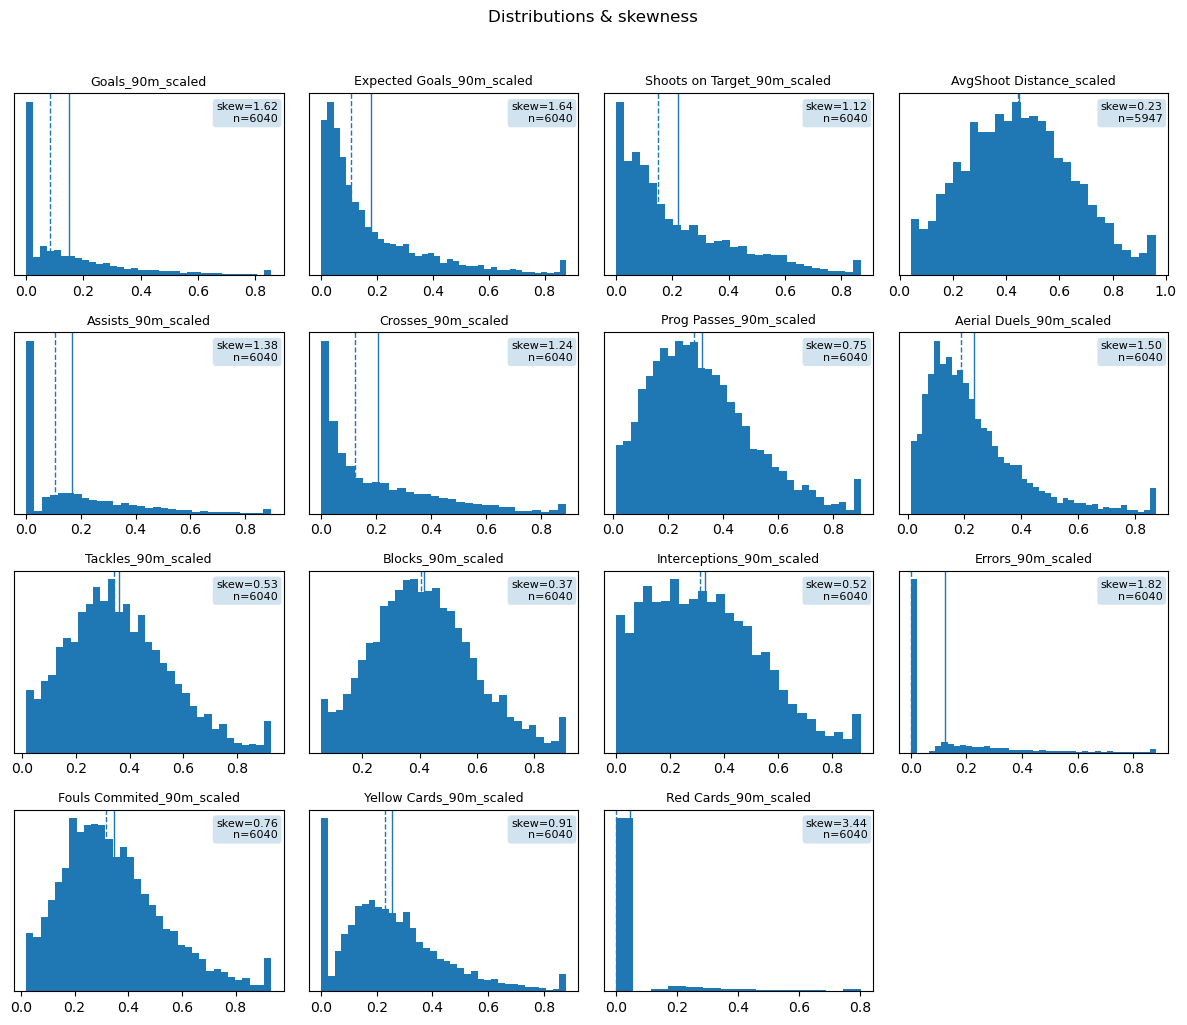

In [25]:
plot_skew_grid(
    df_scaled[df_scaled['elegible']==1],
    cols=["Goals_90m_scaled", "Expected Goals_90m_scaled", "Shoots on Target_90m_scaled", "AvgShoot Distance_scaled", 
          "Assists_90m_scaled", "Crosses_90m_scaled", "Prog Passes_90m_scaled", "Cmp% Passes_scaled", "Aerial Duels_90m_scaled",
          "Tackles_90m_scaled", "Blocks_90m_scaled", "Interceptions_90m_scaled","Errors_90m_scaled", 
          "Fouls Commited_90m_scaled", "Yellow Cards_90m_scaled", "Red Cards_90m_scaled"],
    bins="auto",     
    ncols=4,
    winsor=1        
)

# 2.5. - Feature Engeneering: Composite Features

Now, we will create composite features that aggregate related player statistics. To do that, first of all we define dictionaries with features and weights for each composite feature. Then, those rules are applied to each individual player to obtain the new composite features.

In [26]:
composites = {
    'Goal Scoring': {
        'Goals_90m_scaled': 0.60, 
        'Goals not Penalty_90m_scaled': 0.40
    },
    'Goal Efficacy': {
        'Goals Minus Expected_90m_scaled': 0.40,
        'Goals/Shoot_scaled': 0.40,
        'Penalty Efficacy_scaled': 0.20
    },
    'Shooting': {
        'Shoots_90m_scaled': 0.30,
        'Shoots on Target_90m_scaled': 0.40,
        'Goals/Shoot':0.20,
        'FreeKick Tacker':0.10,
    },
    'Passing Influence': {
        'Short Cmp_90m_scaled': 0.175,
        'Medium Cmp_90m_scaled': 0.175,
        'Long Cmp_90m_scaled': 0.175,
        'Prog Passes_90m_scaled': 0.35,
        'Pass Prog Distance_90m_scaled': 0.125
    },
    'Passing Accuracy': {
        'Cmp Passes%_scaled': 0.55,
        'Short Cmp%_scaled': 0.15,
        'Medium Cmp%_scaled': 0.15,
        'Long Cmp%_scaled': 0.15
    },
    'Goal Creation': {
        'Assists_90m_scaled': 0.40,
        'Key Passes_90m_scaled': 0.30,
        'Goal Creating Actions_90m_scaled': 0.20,
        'Penalty Won_90m_scaled':0.10
    },
    'Possession Influence': {
        'Touches_90m_scaled': 0.40,
        'Carries_90m_scaled': 0.40,
        'Fouls Suffered_90m_scaled': 0.20
    },
    'Progression': {
        'Prog Carries_90m_scaled': 0.60,
        'Carries PrgDist_90m_scaled': 0.40
    },
    'Dribling': {
        'Take-Ons Succ_90m_scaled': 0.50,
        'Take-Ons Succ%_scaled': 0.50
    },
    'Aerial Influence': {
        'Aerial Duels_90m_scaled': 0.40,
        'Aerial Duels Won%_scaled': 0.60
    },
    'Defensive Influence': {
        'Tackles_90m_scaled': 0.175,
        'Tackles Won_90m_scaled': 0.20,
        'Blocks_90m_scaled': 0.15,
        'Interceptions_90m_scaled': 0.15,
        'Clearances_90m_scaled': 0.15,
        'Ball Recoveries_90m_scaled': 0.175
    },
    'Discipline and Consistency': {
        'Own Goals_90m_scaled': 0.175,
        'Errors_90m_scaled': 0.175,
        'Yellow Cards_90m_scaled': 0.15,
        'Red Cards_90m_scaled': 0.175,
        'Fouls Commited_90m_scaled': 0.15,
        'Penalty Commited_90m_scaled': 0.175
    }
}

In [27]:
def add_multiple_composites(
    df: pd.DataFrame,
    composites: Dict[str, Dict[str, float]],
    round_to: int = 3,
) -> pd.DataFrame:
    """
    Adds one column per composite (weighted sum). 
    - Missing inputs are created as 0-valued columns.
    - NaNs in inputs are treated as 0.
    - Final DataFrame keeps the original column order and places the composite
      columns at the very end, in the same order as in `composites`.
    """
    out = df.copy()
    original_cols = list(out.columns)          # preserve original order
    composite_names = list(composites.keys())  # preserve requested order

    elig = (out["elegible"] == 1)                  

    for comp_name, weights in composites.items():
        cols = list(weights.keys())

        # ensure every input exists; missing → zeros
        for c in cols:
            if c not in out.columns:
                out[c] = 0.0

        X = out[cols].apply(pd.to_numeric, errors="coerce").fillna(0.0)
        w = pd.Series(weights, index=cols, dtype=float)

        comp = (X * w).sum(axis=1).round(round_to) 
        out[comp_name] = np.nan                     
        out.loc[elig, comp_name] = comp[elig]     

    # ---- single deterministic reorder: originals + any new inputs + composites
    # (new inputs = columns that weren't in original_cols and aren't composites)
    new_inputs = [c for c in out.columns if c not in original_cols and c not in composite_names]
    new_order = original_cols + new_inputs + composite_names
    out = out.loc[:, new_order]

    return out

In [28]:
df_scaled = add_multiple_composites (df_scaled, composites, round_to=3)

In [29]:
df_scaled['Discipline and Consistency'] = 1 - df_scaled['Discipline and Consistency']

In [30]:
new_composite_features = ['Goal Scoring','Goal Efficacy','Shooting','Passing Influence','Passing Accuracy','Goal Creation',
                          'Possession Influence','Progression','Dribling','Aerial Influence','Defensive Influence','Discipline and Consistency']

cols = [c for c in new_composite_features if c in df_scaled.columns]

df_scaled[cols].describe() 

,Goal Scoring,Goal Efficacy,Shooting,Passing Influence,Passing Accuracy,Goal Creation,Possession Influence,Progression,Dribling,Aerial Influence,Defensive Influence,Discipline and Consistency
count,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000
mean,0.148322,0.277752,0.197056,0.318473,0.623073,0.227217,0.375493,0.286424,0.336752,0.417169,0.362529,0.865916
std,0.190115,0.128805,0.153892,0.164804,0.175314,0.166451,0.149852,0.166425,0.149060,0.144959,0.138032,0.079791
min,0.000000,0.000000,0.000000,0.001000,0.005000,0.000000,0.009000,0.000000,0.000000,0.000000,0.019000,0.284000
25%,0.000000,0.186000,0.078000,0.199000,0.509000,0.097000,0.274000,0.166000,0.252000,0.322000,0.269000,0.826000
50%,0.082000,0.242000,0.152000,0.316000,0.639000,0.193000,0.367000,0.254000,0.340000,0.423000,0.371000,0.880000
75%,0.223000,0.346000,0.294000,0.420000,0.757250,0.324000,0.465000,0.373000,0.432000,0.517250,0.456000,0.922000
max,1.000000,0.870000,0.840000,1.000000,0.977000,0.978000,0.937000,1.000000,0.854000,0.909000,0.866000,1.000000


# Save

**Save file** as `df_proc`:

In [31]:
df_scaled.to_parquet("dfs/df_proc.parquet", index=False)